# Processor temperature

We have a temperature sensor in the processor of our company's server. We want to analyze the data provided to determinate whether we should change the cooling system for a better one. It is expensive and as a data analyst we cannot make decisions without a basis.

We provide the temperatures measured throughout the 24 hours of a day in a list-type data structure composed of 24 integers:
```
temperatures_C = [33,66,65,0,59,60,62,64,70,76,80,69,80,83,68,79,61,53,50,49,53,48,45,39]
```

## Goals

1. Treatment of lists
2. Use of loop or list comprenhention
3. Calculation of the mean, minimum and maximum.
4. Filtering of lists.
5. Interpolate an outlier.
6. Logical operators.
7. Print

## Temperature graph
To facilitate understanding, the temperature graph is shown below. You do not have to do anything in this section. The test starts in **Problem**.

Matplotlib is building the font cache using fc-list. This may take a moment.


Text(0.5, 1.0, 'Temperatures of our server throughout the day')

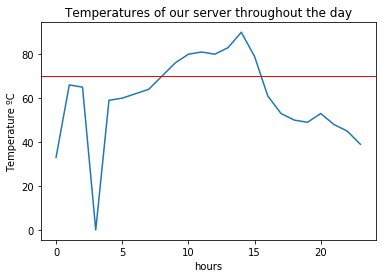

In [33]:
# import
import matplotlib.pyplot as plt
%matplotlib inline

# axis x, axis y
y = [33,66,65,0,59,60,62,64,70,76,80,81,80,83,90,79,61,53,50,49,53,48,45,39]
x = list(range(len(y)))

# plot
plt.plot(x, y)
plt.axhline(y=70, linewidth=1, color='r')
plt.xlabel('hours')
plt.ylabel('Temperature ºC')
plt.title('Temperatures of our server throughout the day')

## Problem

If the sensor detects more than 4 hours with temperatures greater than or equal to 70ºC or any temperature above 80ºC or the average exceeds 65ºC throughout the day, we must give the order to change the cooling system to avoid damaging the processor.

We will guide you step by step so you can make the decision by calculating some intermediate steps:

1. Minimum temperature
2. Maximum temperature
3. Temperatures equal to or greater than 70ºC
4. Average temperatures throughout the day.
5. If there was a sensor failure at 03:00 and we did not capture the data, how would you estimate the value that we lack? Correct that value in the list of temperatures.
6. Bonus: Our maintenance staff is from the United States and does not understand the international metric system. Pass temperatures to Degrees Fahrenheit.

Formula: F = 1.8 * C + 32

web: https://en.wikipedia.org/wiki/Conversion_of_units_of_temperature


In [73]:
# assign a variable to the list of temperatures

# 1. Calculate the minimum of the list and print the value using print()
temperatures_C = [33,66,65,0,59,60,62,64,70,76,80,69,80,83,68,79,61,53,50,49,53,48,45,39]

# 2. Calculate the maximum of the list and print the value using print()
min_temp = min(temperatures_C)
print("minimum temperature:" , min_temp)

# 3. Items in the list that are greater than 70ºC and print the result
above_70 = [i for i in temperatures_C if i > 70]
print("greaten than 70 degrees:" , above_70)

# 4. Calculate the mean temperature throughout the day and print the result
mean = float(sum(temperatures_C)) / len(temperatures_C)
print("mean:" , mean)

# 5.1 Solve the fault in the sensor by estimating a value

import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

temp_array = np.array(temperatures_C)
index = np.arange(len(temp_array))
idx = np.nonzero(temp_array)
f = interp1d(index[idx],temp_array[idx])
new_temp = f(index)


# 5.2 Update of the estimated value at 03:00 on the list
original_temperatures_C = temperatures_C
replaced_temperatures_C = [int(i) for i in new_temp]
print(replaced_temperatures_C)

#print(original_temperatures_C , temperatures_C)
# Bonus: convert the list of ºC to ºFarenheit

temperatures_F = [1.8 * C + 32 for C in replaced_temperatures_C]
print('The temperatures in Farenheit:' , temperatures_F)

minimum temperature: 0
greaten than 70 degrees: [76, 80, 80, 83, 79]
mean: 58.833333333333336
[33, 66, 65, 62, 59, 60, 62, 64, 70, 76, 80, 69, 80, 83, 68, 79, 61, 53, 50, 49, 53, 48, 45, 39]
The temperatures in Farenheit: [91.4, 150.8, 149.0, 143.60000000000002, 138.2, 140.0, 143.60000000000002, 147.2, 158.0, 168.8, 176.0, 156.2, 176.0, 181.4, 154.4, 174.20000000000002, 141.8, 127.4, 122.0, 120.2, 127.4, 118.4, 113.0, 102.2]


## Take the decision
Remember that if the sensor detects more than 4 hours with temperatures greater than or equal to 70ºC or any temperature higher than 80ºC or the average was higher than 65ºC throughout the day, we must give the order to change the cooling system to avoid the danger of damaging the equipment:
* more than 4 hours with temperatures greater than or equal to 70ºC
* some temperature higher than 80ºC
* average was higher than 65ºC throughout the day
If any of these three is met, the cooling system must be changed.


In [58]:
# Print True or False depending on whether you would change the cooling system or not
to_change_or_not_to_change = 0
if len(above_70) > 4 or [i > 80 for i in replaced_temperatures_C] or mean > 65:
    to_change_or_not_to_change = 1

print('Would you change the cooling system?', bool(to_change_or_not_to_change))


Would you change the cooling system? True


## Future improvements
1. We want the hours (not the temperatures) whose temperature exceeds 70ºC
2. Condition that those hours are more than 4 consecutive and consecutive, not simply the sum of the whole set. Is this condition met?
3. Average of each of the lists (ºC and ºF). How they relate?
4. Standard deviation of each of the lists. How they relate?


In [75]:
# 1. We want the hours (not the temperatures) whose temperature exceeds 70ºC
hours_above_70 = [i for i in range(len(replaced_temperatures_C)) if replaced_temperatures_C[i] > 70 ]
print(hours_above_70)


[9, 10, 12, 13, 15]


In [82]:
# 2. Condition that those hours are more than 4 consecutive and consecutive, not simply the sum of the whole set. Is this condition met?

first_hour = [i for i in range(len(replaced_temperatures_C)) if replaced_temperatures_C[i] > 70 ][0]

count = 1
for hour in range(1,len(hours_above_70)):
    if hours_above_70[hour] - first_hour == 1:
        count += 1
    else:
        count = 0
        
print('There were more than 4 consecutive hours with temperatures above 70 degrees Celcius:', bool(count > 4))

    

9
There were more than 4 consecutive hours with temperatures above 70 degrees Celcius: False


In [84]:
# 3. Average of each of the lists (ºC and ºF). How they relate?

mean_C = np.mean(replaced_temperatures_C)
mean_F = np.mean(temperatures_F)

print('Avarage tempertature in C:', mean_C, 'Avarage tempertature in F:', mean_F, 
      'The mean temperature in Farenheit is 1.8 * mean temperature in Celcius + 32')

Avarage tempertature in C: 61.416666666666664 Avarage tempertature in F: 142.54999999999998 The mean temperature in Farenheit is 1.8 * mean temperature in Celcius + 32


In [88]:
# 4. Standard deviation of each of the lists. How they relate?

sd_temp_C = np.std(replaced_temperatures_C)
sd_temp_F = np.std(temperatures_F)

print('Standard Deviation of tempertatures in C:', sd_temp_C, 'Standard Deviation of tempertatures in F:', sd_temp_F, 
      'The Standard Deviation in Farenheit is 1.8 * mean temperature in Celcius')


Standard Deviation of tempertatures in C: 13.050915251004005 Standard Deviation of tempertatures in F: 23.491647451807204 The Standard Deviation in Farenheit is 1.8 * mean temperature in Celcius
